# TIME-SERIES EDA

In [149]:
# pip install pandas-datareader

In [193]:
import pandas as pd 
from datetime import datetime 
import pandas_datareader as pdr

In [194]:
## importing tesla stock prices
df=pd.read_csv("TSLA.csv")

In [195]:
df["Date"] = pd.to_datetime(df["Date"]) ## converting date column to datetime from float 

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.3 KB


In [197]:
df.set_index(df["Date"] , inplace=True) # setting index to date column

In [198]:
df.drop("Date" , axis=1 , inplace=True) # droppiing date column

<Axes: xlabel='Date'>

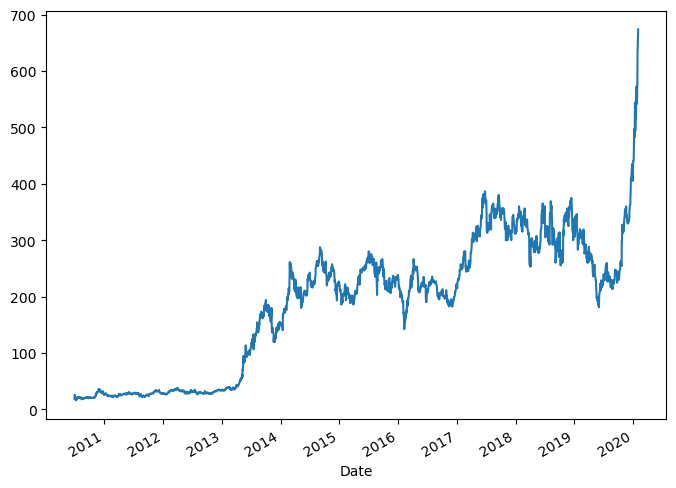

In [199]:
df["Open"].plot(figsize = (8,6) ) # plotting "open" column  

In [200]:
# setting limits

<Axes: xlabel='Date'>

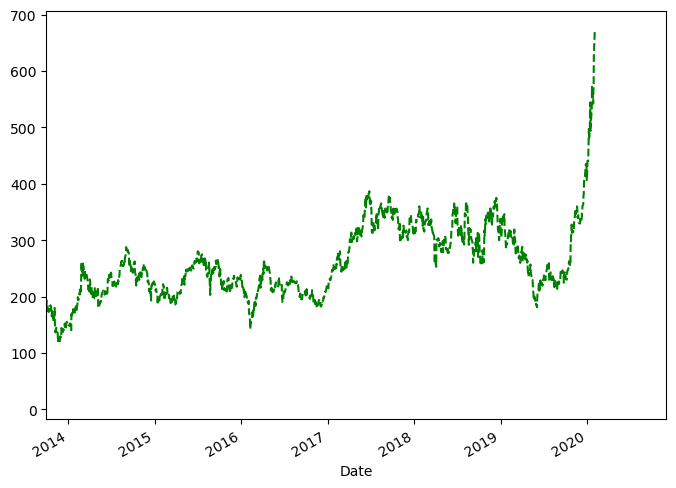

In [201]:
df["Open"].plot(xlim = ["2013-10-01" , "2020-12-01"] ,linestyle = "--",figsize = (8,6), c="green")

In [202]:
df.index 

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03'],
              dtype='datetime64[ns]', name='Date', length=2416, freq=None)

In [203]:
# selecting specific rows by indexing
df.loc['2010-06-29':'2015-06-29']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2015-06-23,260.320007,268.000000,258.570007,267.670013,267.670013,3870800
2015-06-24,266.980011,267.350006,263.720001,265.170013,265.170013,2412300
2015-06-25,266.450012,271.410004,265.250000,268.790009,268.790009,2849200


In [204]:
# accessing data of the specific rows selected above
filt = df.loc['2010-06-29':'2015-06-29']["Open"]
filt

Date
2010-06-29     19.000000
2010-06-30     25.790001
2010-07-01     25.000000
2010-07-02     23.000000
2010-07-06     20.000000
                 ...    
2015-06-23    260.320007
2015-06-24    266.980011
2015-06-25    266.450012
2015-06-26    268.890015
2015-06-29    261.950012
Name: Open, Length: 1259, dtype: float64

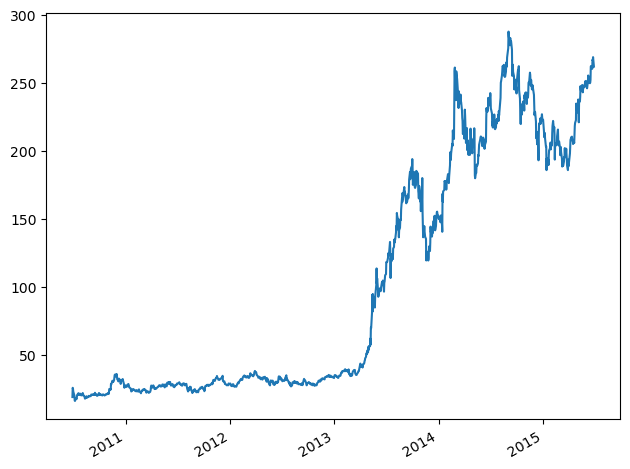

In [205]:
fig,axis = plt.subplots()
axis.plot(filt.index , filt)
# used for preventing overlapping
fig.autofmt_xdate()
plt.tight_layout()

In [215]:
from datetime import datetime

In [414]:
datetime.now() # current date and time

datetime.datetime(2023, 9, 7, 10, 57, 18, 513404)

In [221]:
date = datetime(2029,9,2)# creating a  datetime variable
date

datetime.datetime(2029, 9, 2, 0, 0)

In [228]:
print(date.day)
print(date.month)
print(date.year)
print(date.weekday())


2
9
2029
6


# Resampling()

The df.resample() method in pandas is used to resample time-series data in a DataFrame. Resampling involves changing the frequency of the time series data, which can be useful for aggregating or downsampling data to a lower frequency (e.g., daily to monthly) or upsampling data to a higher frequency (e.g., hourly to every 15 minutes). 

In pandas, when using the resample method for time-series data, you can specify various rules to determine the frequency of resampling. These rules are used to group the data into different time periods. Here are some commonly used resampling rules:

'A' or 'Y': Annual frequency. Resamples the data at the end of each year.

'Q': Quarterly frequency. Resamples the data at the end of each quarter (3 months).

'M': Monthly frequency. Resamples the data at the end of each month.

'W': Weekly frequency. Resamples the data at the end of each week.

'D': Daily frequency. Resamples the data at the end of each day.

'H': Hourly frequency. Resamples the data at the end of each hour.

'T' or 'min': Minute frequency. Resamples the data at the end of each minute.

'S': Second frequency. Resamples the data at the end of each second.

'L' or 'ms': Millisecond frequency. Resamples the data at the end of each millisecond.

'U' or 'us': Microsecond frequency. Resamples the data at the end of each microsecond.

'N' or 'ns': Nanosecond frequency. Resamples the data at the end of each nanosecond.

Custom Offset Aliases: You can also create custom resampling rules by combining frequency strings with a multiplier. For example, '3H' represents every 3 hours, '10T' represents every 10 minutes, and so on.

These rules allow you to control the granularity of your time-series data when performing resampling operations. Depending on your data and analysis needs, you can choose the appropriate resampling rule to aggregate or downsample your data to the desired frequency.






In [272]:
print(df.resample(rule= "A"))
print(type(df.resample(rule= "A")))

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, origin=start_day]
<class 'pandas.core.resample.DatetimeIndexResampler'>


In [310]:
df.loc["2010-01-01":"2010-12-31"]["Open"].max()

35.869999

as we can see above that in year 2010 the maximum value of "Open" is 35.86999

In [357]:
df.resample(rule= "A").max() # Resamples data at the end of each calendar year. and taking the maximum value within each year. 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,35.869999,36.419998,34.750000,35.470001,35.470001,18766300
2011-12-31,34.630001,35.000000,34.029999,34.939999,34.939999,11517800
2012-12-31,38.189999,39.950001,37.110001,38.009998,38.009998,5680400
2013-12-31,193.960007,194.500000,188.369995,193.369995,193.369995,37163900
2014-12-31,287.670013,291.420013,280.399994,286.040009,286.040009,32681700
2015-12-31,280.200012,286.649994,276.299988,282.260010,282.260010,15649600
2016-12-31,266.450012,269.339996,254.509995,265.420013,265.420013,23742400
2017-12-31,386.690002,389.609985,379.350006,385.000000,385.000000,19791400
2018-12-31,375.000000,387.459991,367.119995,379.570007,379.570007,33649700


it is clear above that rule("A") gives the maximum of each column within every year

In [286]:
df.resample(rule= "M").max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-30,25.790001,30.420000,23.299999,23.889999,23.889999,18766300
2010-07-31,25.000000,25.920000,21.059999,21.959999,21.959999,8218800
2010-08-31,21.950001,22.180000,20.850000,21.950001,21.950001,1281300
2010-09-30,22.150000,23.160000,21.129999,21.980000,21.980000,2684500
2010-10-31,21.389999,21.870001,21.049999,21.840000,21.840000,660900
...,...,...,...,...,...,...
2019-10-31,327.540009,340.839996,322.600006,328.130005,328.130005,30006100
2019-11-30,360.000000,361.200012,354.000000,359.519989,359.519989,16870600
2019-12-31,435.000000,435.309998,426.350006,430.940002,430.940002,18174200


In [312]:
df.resample(rule= "A").mean() #Resamples data at the end of each month. and taking the maximum value within each month. 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,23.408000,24.077231,22.646077,23.341846,23.341846,1.579762e+06
2011-12-31,26.821984,27.380238,26.194167,26.804762,26.804762,1.290615e+06
2012-12-31,31.203120,31.809160,30.545880,31.168600,31.168600,1.229796e+06
2013-12-31,104.416428,106.853016,101.779881,104.401230,104.401230,8.407722e+06
2014-12-31,223.415397,227.449881,219.206111,223.329088,223.329088,6.913973e+06
2015-12-31,229.831944,233.381666,226.270635,230.042898,230.042898,4.318325e+06
2016-12-31,210.058452,213.433492,206.286151,209.767262,209.767262,4.612546e+06
2017-12-31,314.296215,318.450598,309.686972,314.316295,314.316295,6.334786e+06
2018-12-31,317.183466,323.693626,310.552311,317.309921,317.309921,8.612107e+06


In [314]:
df.resample(rule= "Q").sum().head(10)#Resamples data at the end of each calendar quarter (every 3 months) & summing values within each quarter.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-30,44.790001,55.420000,40.840000,47.719999,47.719999,35953400
2010-09-30,1287.900013,1318.259996,1241.399994,1275.510002,1275.510002,97659900
2010-12-31,1710.349996,1756.360007,1661.749995,1711.209999,1711.209999,71755800
2011-03-31,1504.399998,1531.029992,1470.860002,1501.500000,1501.500000,90286900
2011-06-30,1723.880017,1756.250008,1681.369989,1716.640003,1716.640003,99971000
2011-09-30,1661.790001,1698.840008,1618.179999,1655.929992,1655.929992,66339300
2011-12-31,1869.070007,1913.700007,1830.519998,1880.729994,1880.729994,68637900
2012-03-31,1978.379991,2016.830004,1936.350000,1980.340009,1980.340009,70967000
2012-06-30,2001.159994,2039.530010,1950.719987,1990.010000,1990.010000,83065300


In [315]:
df.resample(rule= "A").max()["Open"]

Date
2010-12-31     35.869999
2011-12-31     34.630001
2012-12-31     38.189999
2013-12-31    193.960007
2014-12-31    287.670013
2015-12-31    280.200012
2016-12-31    266.450012
2017-12-31    386.690002
2018-12-31    375.000000
2019-12-31    435.000000
2020-12-31    673.690002
Freq: A-DEC, Name: Open, dtype: float64

<Axes: xlabel='Date'>

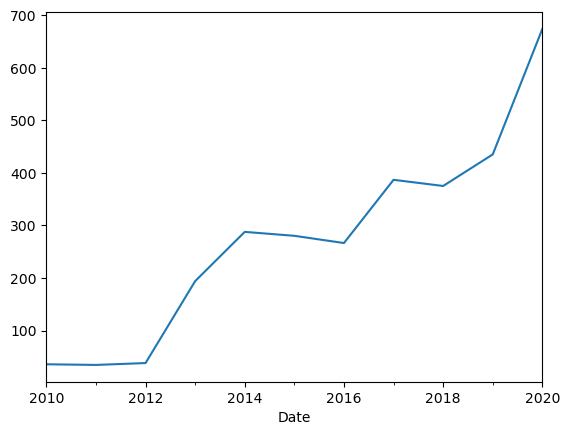

In [265]:
# here we have selected "open" column and plot its variation for the maximum at the end of the year from 2010 to 2020
df.resample(rule= "A").max()["Open"].plot() 

<Axes: xlabel='Date'>

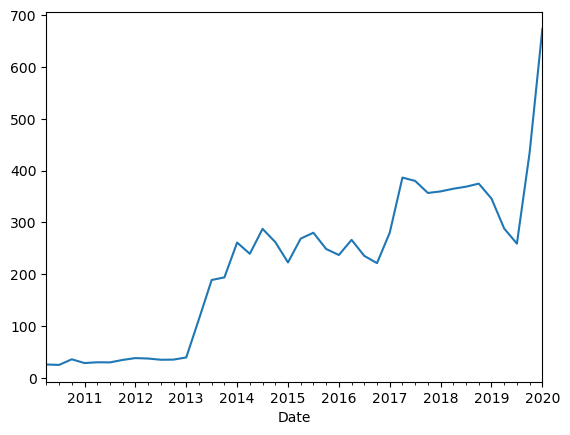

In [281]:
# here we have selected "open" column and plot its variation for the maximum at the end of every 3 months from 2010 to 2020
df.resample(rule= "Q").max()["Open"].plot() 

<Axes: xlabel='Date'>

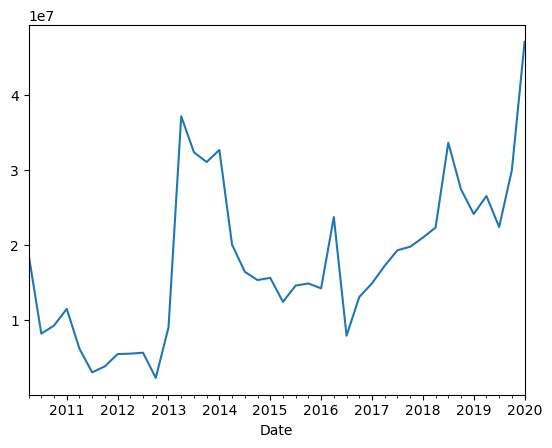

In [415]:
df.resample(rule= "Q").max()["Volume"].plot() ## here we have selected "Volumne" column and plot its variation for the maximum at the end of every 3 months from 2010 to 2020

<Axes: xlabel='Date'>

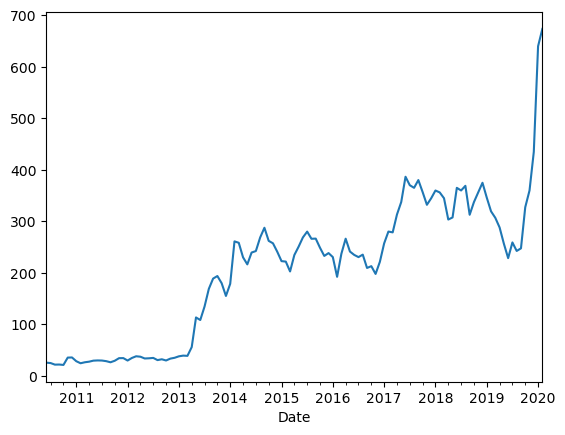

In [294]:
df.resample(rule= "M").max()["Open"].plot()  # here we can see the variation monthly , maximum at the end of the each month 

rule="BA" in df.resample(rule="BA") is a way to specify that you want to resample your time-series data at the end of each business year, taking into account business days and excluding weekends and holidays. This is useful for financial and business data analysis where business calendars are relevant

In [416]:
#saturday's and sunday's data had been removed from the tables only bussiness days 
df.resample(rule= "BA").sum()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,3043.040010,3130.040003,2943.989989,3034.440000,3034.440000,205369100
2011-12-30,6759.140023,6899.820015,6600.929988,6754.799989,6754.799989,325235100
2012-12-31,7800.779975,7952.289998,7636.469991,7792.150009,7792.150009,307449000
2013-12-31,26312.939975,26926.959915,25648.530058,26309.109891,26309.109891,2118745900
2014-12-31,56300.680035,57317.369975,55239.940098,56278.930066,56278.930066,1742321300
2015-12-31,57917.649980,58812.179923,57020.199898,57970.810213,57970.810213,1088217800
2016-12-30,52934.730018,53785.239920,51984.109983,52861.349931,52861.349931,1162361700
2017-12-29,78888.350051,79931.100075,77731.430017,78893.390077,78893.390077,1590031400
2018-12-31,79613.049993,81247.100026,77948.629944,79644.790099,79644.790099,2161638800


Date
2010-12-31     23.408000
2011-12-31     26.821984
2012-12-31     31.203120
2013-12-31    104.416428
2014-12-31    223.415397
2015-12-31    229.831944
2016-12-31    210.058452
2017-12-31    314.296215
2018-12-31    317.183466
2019-12-31    273.028135
2020-12-31    529.892728
Freq: A-DEC, Name: Open, dtype: float64


<Axes: xlabel='Date'>

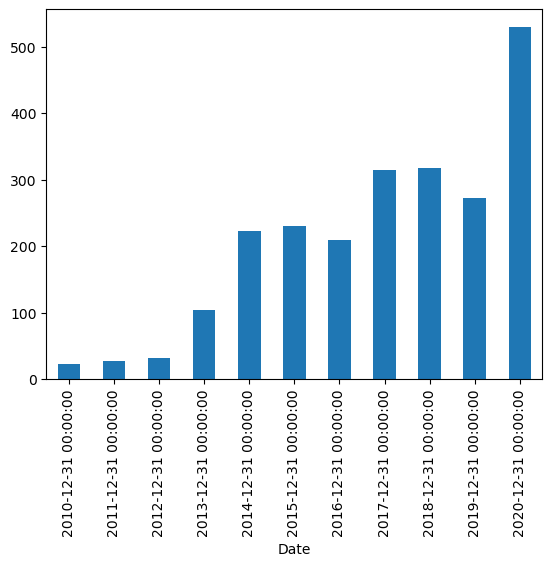

In [355]:
print(df["Open"].resample(rule= "A").mean())
df["Open"].resample(rule= "A").mean().plot(kind="bar")

Date
2010-12-31     23.408000
2011-12-30     26.821984
2012-12-31     31.203120
2013-12-31    104.416428
2014-12-31    223.415397
2015-12-31    229.831944
2016-12-30    210.058452
2017-12-29    314.296215
2018-12-31    317.183466
2019-12-31    273.028135
2020-12-31    529.892728
Freq: BA-DEC, Name: Open, dtype: float64


<Axes: xlabel='Date'>

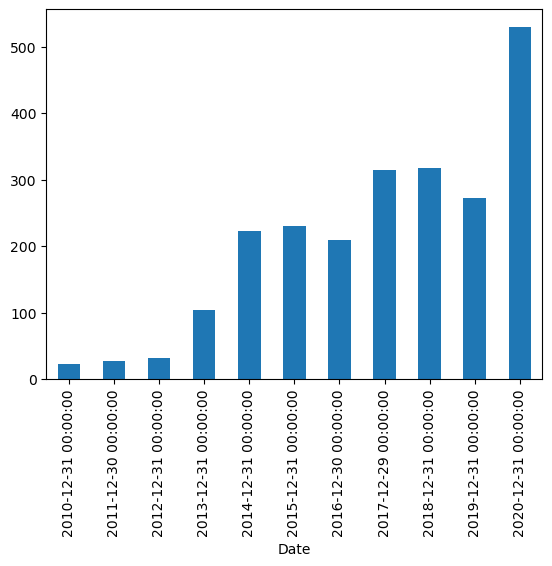

In [354]:
print(df["Open"].resample(rule= "BA").mean())
df["Open"].resample(rule= "BA").mean().plot(kind="bar")

# Rolling()

Imagine you have a time series dataset, like daily stock prices over a month. You want to calculate a moving average to smooth out the noise in the data and identify trends.

**Window Size**: Choose a window size, say 5 days. This means you'll calculate the average of the last 5 days' stock prices for each day.

**Start at the Beginning**: Begin at the first day of your dataset.

**Calculate Average**: For the first day, you take the average of the stock prices for the first 5 days.

**Move Forward**: Then, you move to the next day, so your window now includes the second to the sixth day, and you calculate the average again.

**Repeat**: Keep moving one day at a time, calculating the average for each new window of 5 days. This way, you create a new series of values representing the 5-day moving average.

In essence, the "rolling" part means you're continually recalculating something (in this case, an average) for a fixed window of data points as you move through your dataset. This helps you see trends and patterns over time while smoothing out short-term fluctuations.

So, the rolling function in pandas automates this process for you, allowing you to specify the window size and the calculation you want to apply (e.g., mean, sum, etc.), and it returns a new series of values based on this rolling calculation.

Example: Imagine you have a simple dataset of daily temperatures for a week:

    -Day 1: 72°F
    -Day 2: 74°F
    -Day 3: 76°F
    -Day 4: 78°F
    -Day 5: 80°F
    -Day 6: 82°F
    -Day 7: 84°F
Now, let's calculate a 3-day rolling average without using any code:

Day 1: To calculate the rolling average on Day 1, we consider the temperatures of the last 3 days (Day 1, Day 2, and Day 3). The average is (72 + 74 + 76) / 3 = 74°F.

Day 2: On Day 2, we move one day forward. Now, the rolling window covers the temperatures of Day 2, Day 3, and Day 4. The average is (74 + 76 + 78) / 3 = 76°F.

Day 3: The rolling window shifts again. It now includes Day 3, Day 4, and Day 5. The average is (76 + 78 + 80) / 3 = 78°F.

This process continues:

Day 4: The rolling window covers Day 4, Day 5, and Day 6. The average is (78 + 80 + 82) / 3 = 80°F.
Day 5: The rolling window covers Day 5, Day 6, and Day 7. The average is (80 + 82 + 84) / 3 = 82°F.
So, as you can see, the rolling function calculates the average temperature for each day by considering a "rolling" or moving window of the past 3 days' temperatures. This allows you to smooth out the data and identify trends over a short-term period.

In [364]:
rolling_mean = df['Open'].rolling(window=2).mean()
rolling_mean

Date
2010-06-29           NaN
2010-06-30     22.395001
2010-07-01     25.395001
2010-07-02     24.000000
2010-07-06     21.500000
                 ...    
2020-01-28    555.239990
2020-01-29    572.089996
2020-01-30    604.054993
2020-01-31    636.209992
2020-02-03    656.845001
Name: Open, Length: 2416, dtype: float64

<Axes: xlabel='Date'>

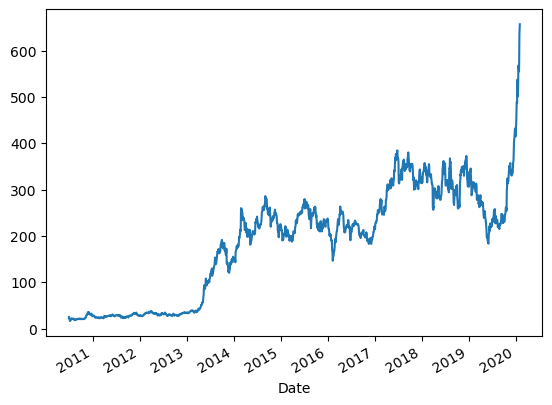

In [365]:
rolling_mean.plot()

In [375]:
df.rolling(window=5).mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-06,22.558000,24.888000,19.130000,20.998000,20.998000,11235780.0
...,...,...,...,...,...,...
2020-01-28,563.450000,578.321997,553.264002,566.300012,566.300012,18154040.0
2020-01-29,564.209997,577.381995,554.930005,568.586011,568.586011,15440540.0
2020-01-30,577.843994,591.157996,567.410010,582.308008,582.308008,17311480.0


    1.For the first row (2010-06-29), you would calculate the average of the closing prices for the previous 5 days, but since there are not enough previous days, we would not get a result for this date.

    2.For the second row (2010-06-30), you calculate the average of the closing prices for the previous 5 days, including the current day and the 4 preceding days: (23.8900 + 23.8300 + 21.9600 + 19.2000 + 16.1100) / 5 = 21.7980.
    
    3.This process continues as you move down the table, calculating the 5-day rolling average for each day where you have enough historical data to do so.

In [377]:
df2=df.copy()

In [398]:
df2["rolling mean : 30 days of open"]=df["Open"].rolling(30).mean()

In [399]:
df2

,Open,High,Low,Close,Adj Close,Volume,rolling mean : 5 days of open,rolling mean : 30 days of open
Date,,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,NaN,NaN
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,NaN,NaN
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,NaN,NaN
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,NaN,NaN
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,465.117000,465.117000
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,472.271667,472.271667
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,481.267334,481.267334


<Axes: xlabel='Date'>

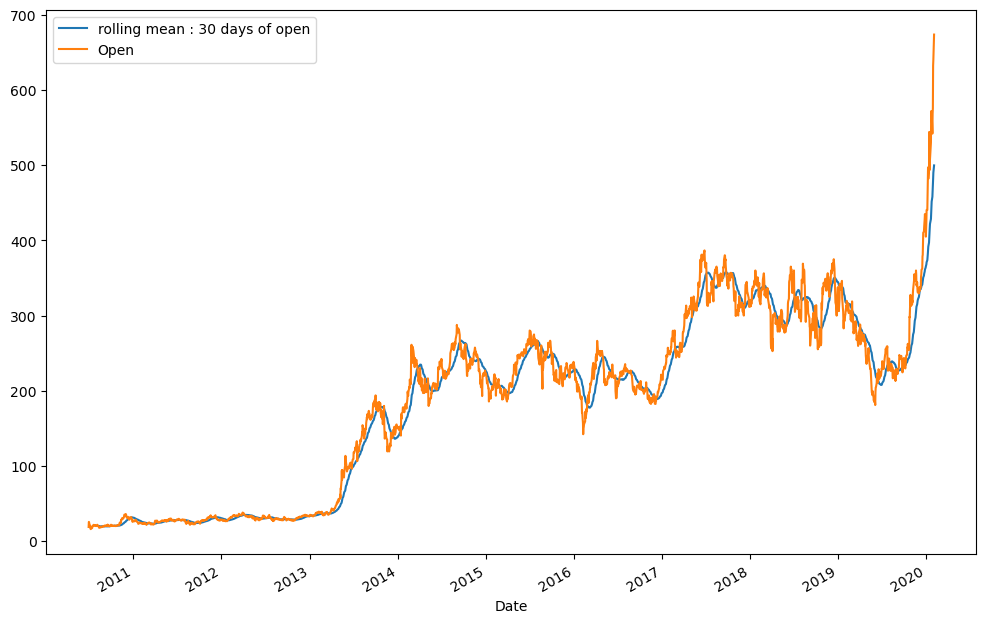

In [407]:
import matplotlib.pyplot as plt
df2[["rolling mean : 30 days of open","Open"]].plot(kind = "line" , figsize=(12,8) , )

In [408]:
#the rolling of 30 days in open had produces a lot of smoothing in our graph

<Axes: ylabel='Density'>

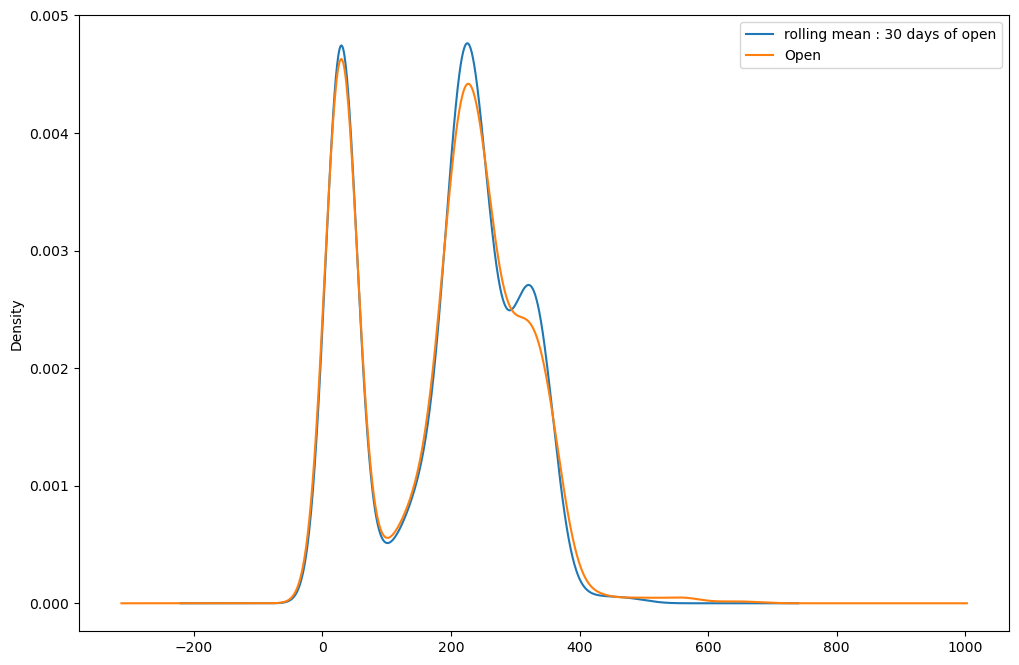

In [405]:
import matplotlib.pyplot as plt
df2[["rolling mean : 30 days of open","Open"]].plot(kind = "kde" , figsize=(12,8))